In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Context

In [2]:
data = pd.read_csv("train.csv", index_col="PassengerId")

Посмотрим на наши данные

In [3]:
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


Информация, которой мы владеем о пассажирах:
- Survived (выжил пассажир или нет)
- Pclass (класс, которым путешествовал пассажир)
- Name (имя пассажира)
- Sex (пол)
- Age (возраст пассажира)
- SibSp (количество братьев и сестер/мужей и жен)
- Parch (количество родителей/детей)
- Ticket (номер билета)
- Fare (стоимость билета)
- Cabin (номер каюты)
- Embarked (порт отправления пассажира)

In [4]:
#Распределим столбцы на категориальные, числовые и целевую переменную
cat_cols = ["Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]
num_cols = ["Age", "SibSp", "Parch", "Fare"]
target_col = ["Survived"]

Посмотрим есть ли дубликаты в данных

In [5]:
data.duplicated().sum()

0

# Data quality assessment

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Все типы данных соответствуют ожидаемым, однако видим, что есть пропущенные значения в некоторых столбцах, посмотрим на них подробнее

In [7]:
data.isna().sum() #посчитаем количество пропущенных значений

Survived        0
Pclass          0
Name            0
Sex             0
Age          3292
SibSp           0
Parch           0
Ticket       4623
Fare          134
Cabin       67866
Embarked      250
dtype: int64

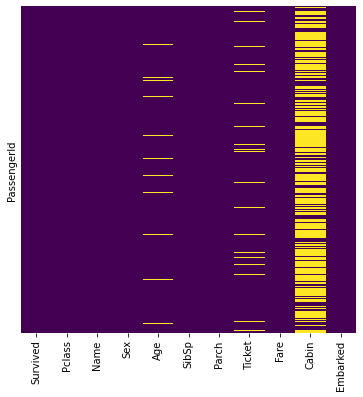

In [8]:
#Изобразим графически пропущенные значения
plt.figure(figsize=(6,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis");

Больше всего пропущенных значений в столбце Cabin, посмотрим с чем это может быть связано

In [9]:
cabin_known = data.groupby(data["Cabin"].notna()).mean()
cabin_known.index.names = ["Cabin_known"]

In [10]:
cabin_known

,Survived,Pclass,Age,SibSp,Parch,Fare
Cabin_known,,,,,,
False,0.342101,2.515766,35.408465,0.357955,0.404812,21.690953
True,0.608608,1.243418,44.575668,0.481608,0.559625,90.893801


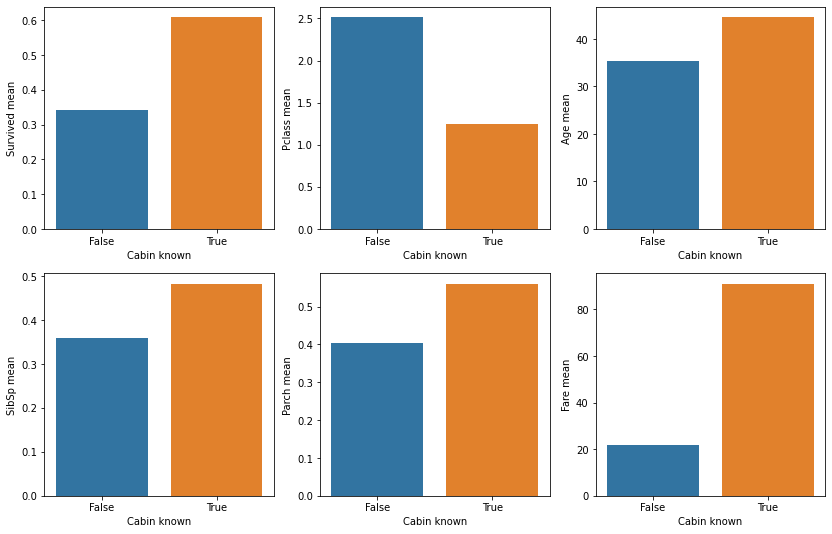

In [11]:
# Отобразим графически распределение значений в зависимости от наличия данных по каюте
fig, axs = plt.subplots(2, 3, figsize=(14, 9))
for i, col in enumerate(cabin_known.columns):
    sns.barplot(ax=axs[i // 3][i % 3], x=cabin_known.index, y=cabin_known[col])
    axs[i // 3][i % 3].set_ylabel(f"{col} mean")
    axs[i // 3][i % 3].set_xlabel("Cabin known")

Как мы видим, номер каюты гораздо чаще известен у выживших людей. Также у них была более высокая стоимость билета и выше класс. Возможно имеет смысл далее заменить столбец с номером каюты на Cabin is known (1, 0)

Посмотрим на зависимости по остальным пропущенным значениям

In [12]:
data.groupby(data["Age"].notna()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.411908,2.127582,NaN,0.381531,0.433475,43.608126
True,0.428279,2.106206,38.355472,0.398240,0.455278,43.940262


In [13]:
data.groupby(data["Ticket"].notna()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Ticket,,,,,,
False,0.521955,2.810080,34.959257,0.479559,0.238590,13.339950
True,0.423173,2.072827,38.519942,0.393722,0.465028,45.412088


In [14]:
data.groupby(data["Embarked"].notna()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
False,0.488000,2.032000,39.435484,0.348000,0.512000,50.335060
True,0.427589,2.107098,38.352695,0.397815,0.454416,43.913319


Остальные пропуски имеют довольно случайный характер, нет каких-либо зависимостей. Единственное, что можно заметить -  увеличивается вероятность отсутствия данных по билету, если он дешевле. Эти пропуски возможно стоит заменить медианным либо средним значением

# Data exploration

In [15]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


Построим графики для того чтобы посмотреть на распределение количественных переменных

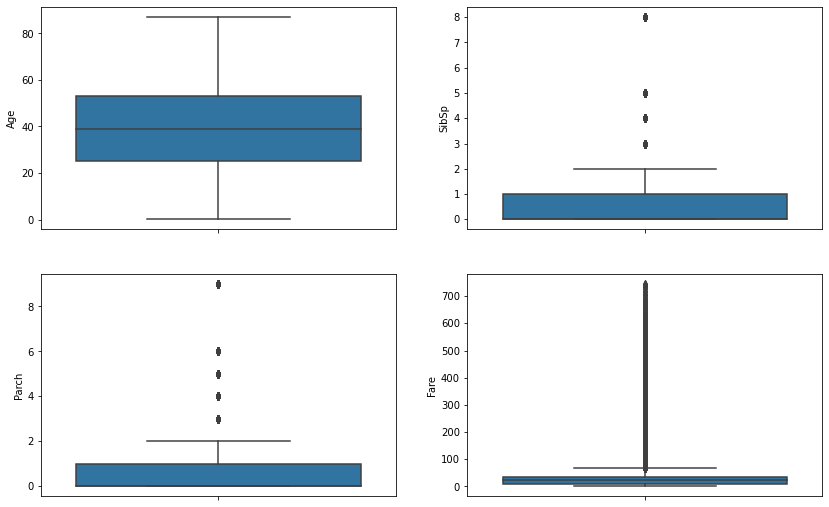

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(14, 9))
for i, col in enumerate(num_cols):
    sns.boxplot(ax=axs[i // 2][i % 2], y=data[col])
    axs[i // 2][i % 2].set_ylabel(f"{col}")    

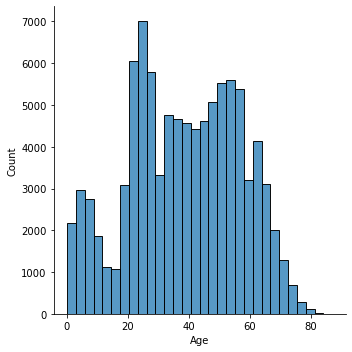

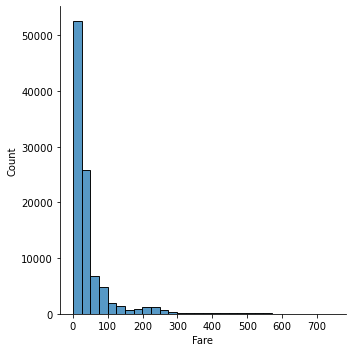

In [17]:
sns.displot(data["Age"], bins=30) #распределение по возрасту
sns.displot(data["Fare"], bins=30); #распределение по стоимости билета

Среднее значение возраста пассажира - 38 лет. Стоимость билета имеет Right-positive skew распределение. Дешевых билетов было больше

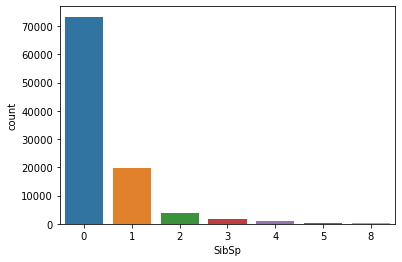

In [18]:
sns.countplot(x=data["SibSp"]); #распределение по SibSp

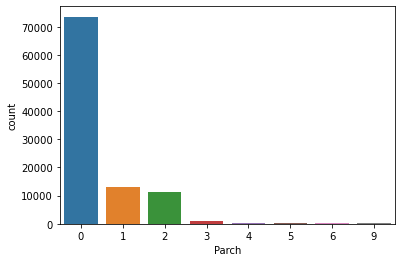

In [19]:
sns.countplot(x=data["Parch"]); #распределение по Parch

Большее количество пассажиров путешествовало в одиночку

In [20]:
# Посмотрим на распределение категориальных признаков
for col in ["Pclass","Sex", "Embarked"]:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

Pclass DISTRIBUTION
3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

Sex DISTRIBUTION
male      56114
female    43886
Name: Sex, dtype: int64

Embarked DISTRIBUTION
S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64



Построим pie-диграммы распределения признаков Pclass, Sex, Embarked

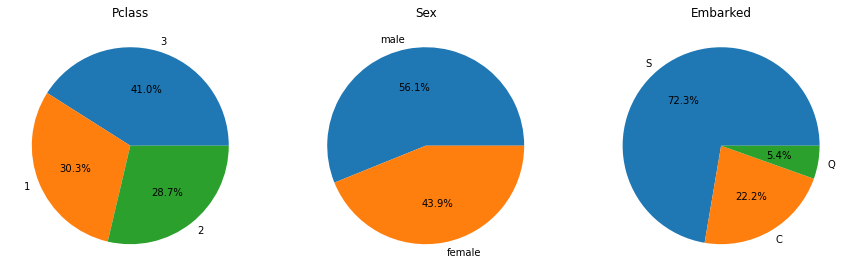

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
for i, col in enumerate(["Pclass","Sex", "Embarked"]):
    axs[i % 3].pie(
        data[col].value_counts(normalize=True),
        labels=data[col].value_counts().index,
        autopct='%1.1f%%'
    )
    axs[i % 3].set_title(col)

Классы в большей степени сбалансированы, есть только значительный перевес в порте отправления (большее количество людей отправлялось из Саутгемптона)

Отобразим графически распределение целевой переменной

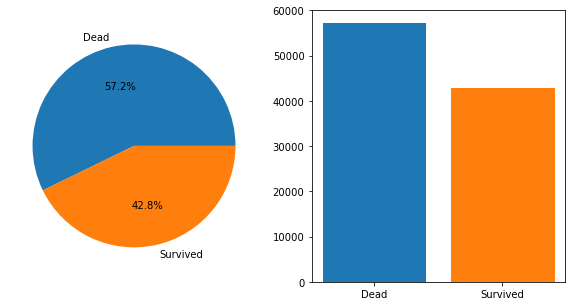

In [22]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(
        data[target_col].value_counts(normalize=True),
        labels=['Dead', 'Survived'],
        autopct='%1.1f%%'
    );

bars = ax2.bar(['Dead', 'Survived'], data[target_col].value_counts())
bars[1].set_color('C1')

Распределение целевой переменной сбалансировано

Посмотрим на корреляции между признаками

In [23]:
data.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.289723,0.103895,-0.007587,0.023352,0.187534
Pclass,-0.289723,1.000000,-0.259109,-0.051436,-0.041848,-0.417354
Age,0.103895,-0.259109,1.000000,-0.112459,-0.125535,0.109164
SibSp,-0.007587,-0.051436,-0.112459,1.000000,0.213126,0.059358
Parch,0.023352,-0.041848,-0.125535,0.213126,1.000000,0.061443
Fare,0.187534,-0.417354,0.109164,0.059358,0.061443,1.000000


Pclass имеет наибольшую корреляцию с целевой переменной

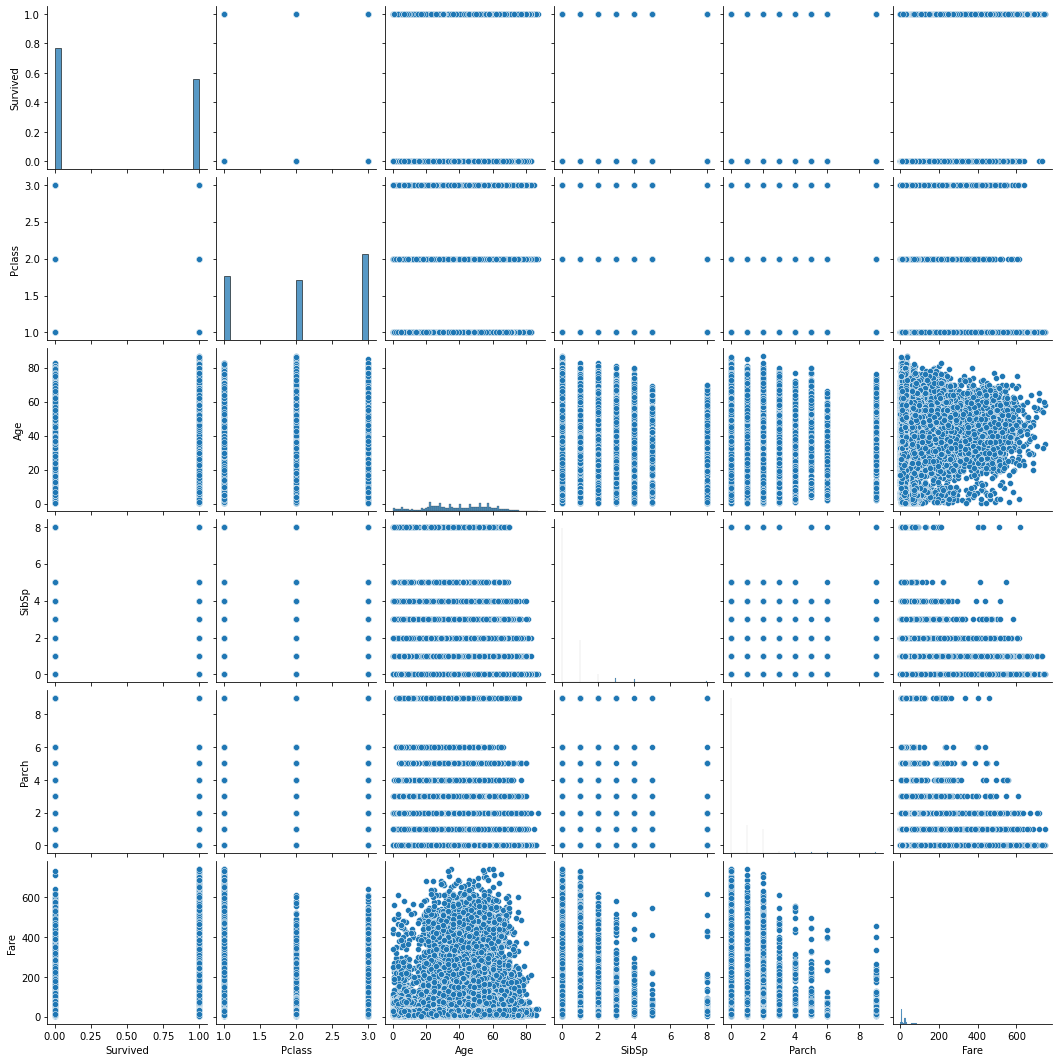

In [33]:
sns.pairplot(data);

### Исследуем влияние признаков на целевую переменную

Рассмотрим влияние класса пассажира

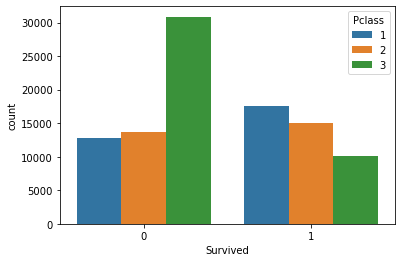

In [24]:
sns.countplot(x="Survived", hue="Pclass", data=data);

Можем наблюдать, что пассажиры, путешествующие более высоким классом, имели больше шансов на выживание

Рассмотрим влияние пола пассажира

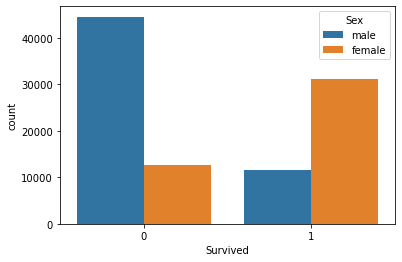

In [25]:
sns.countplot(x="Survived", hue="Sex", data=data);

Женщины выживают в большинстве случаев

Рассмотрим влияние возраста пассажира

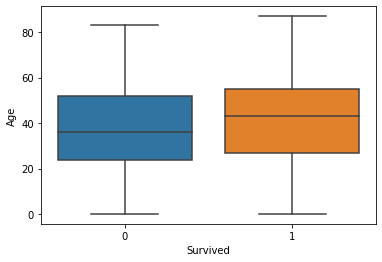

In [26]:
sns.boxplot(x="Survived", y="Age", data=data);

Возраст особо не влияет на шансы выживания, медианное значение ненамного выше у тех, кто выжил

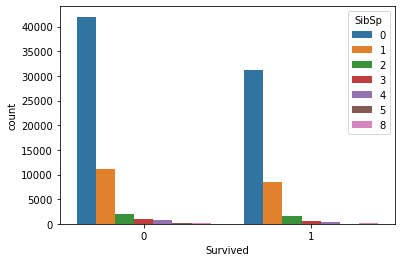

In [27]:
sns.countplot(x="Survived", hue="SibSp", data=data);

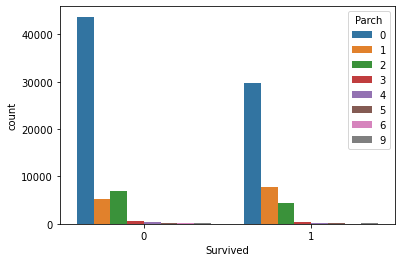

In [28]:
sns.countplot(x="Survived", hue="Parch", data=data);

Количество членов в семье также особо не влияет на целевую переменную

Рассмотрим влияние стоимости билета

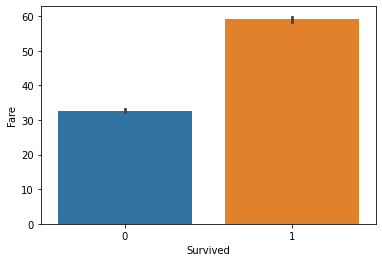

In [70]:
sns.barplot(x="Survived", y="Fare", data=data);

Видна зависимость, что чем дороже билет --> больше шансов на выживание

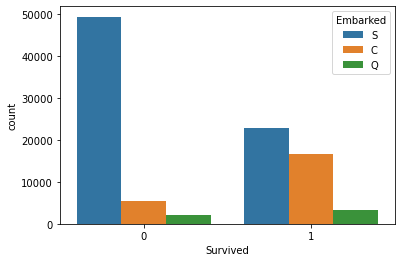

In [34]:
sns.countplot(x="Survived", hue="Embarked", data=data);

Пассажиры, осуществившие посадку в C и Q портах, имели больше шансов на выживание, чем в порту S

Первая буква в номере каюты означает отсек корабля. Сделаем новый столбец с отсеком и проверим его влияние на целевую переменную

In [87]:
data["Deck"] = data["Cabin"].str[0:1]

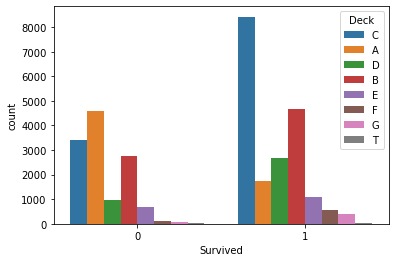

In [88]:
sns.countplot(x="Survived", hue="Deck", data=data);

На диаграмме заметно, что пассажиры блока C спасались в большем количестве случаев

# Summary

Проанализировали исходный датасет. Проверили данные на соответствие нашим ожиданиям. Посмотрели на наличие пропусков в данных, и определили варианты действия с ними. Посмотрели на распределения каждой переменной и ее влияние на целевую переменную. 
Можно сделать вывод, что самые высокие шансы (>88%) на спасение у женщины, севшей на борт в порту C или Q, с билетом в отсек корабля С и ценой билета выше среднего.

In [96]:
data[(data["Sex"]=="female") \
    & (data["Embarked"].isin(["C", "Q"])) \
    & (data["deck"]=="C") \
    & (data["Fare"] > data["Fare"].mean())] \
    .Survived.value_counts(normalize=True)

1    0.88472
0    0.11528
Name: Survived, dtype: float64